#  Mithul
## bl.en.u4aie21034


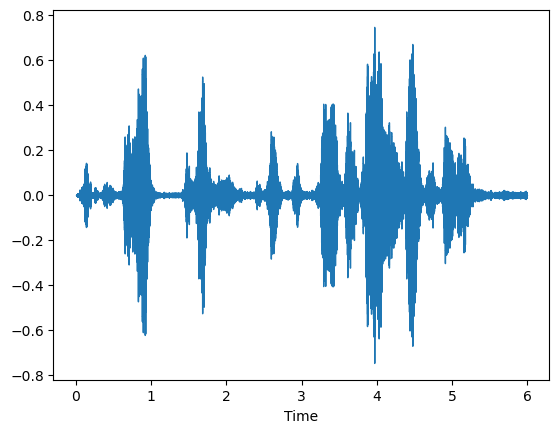

In [2]:
#A1
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram
y, sr = librosa.load('Recording.wav')
librosa.display.waveshow(y)

In [3]:
a = glob('Recording.wav')
ipd.Audio(a[0])

In [4]:
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))

after fft:


C:\Users\mithu\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [5]:
amplitude_spectrum = np.abs(fft_result)
print("amplitude spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))

amplitude spectrum


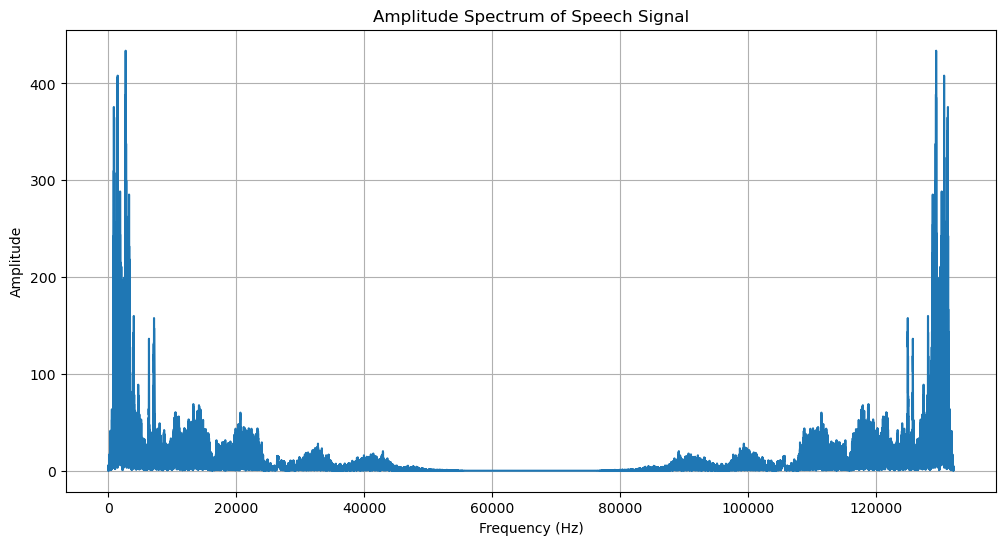

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [7]:
#A2
ifft_result = np.fft.ifft(fft_result)
print("after reconstruction")
ipd.display(ipd.Audio(ifft_result, rate=sr))

after reconstruction


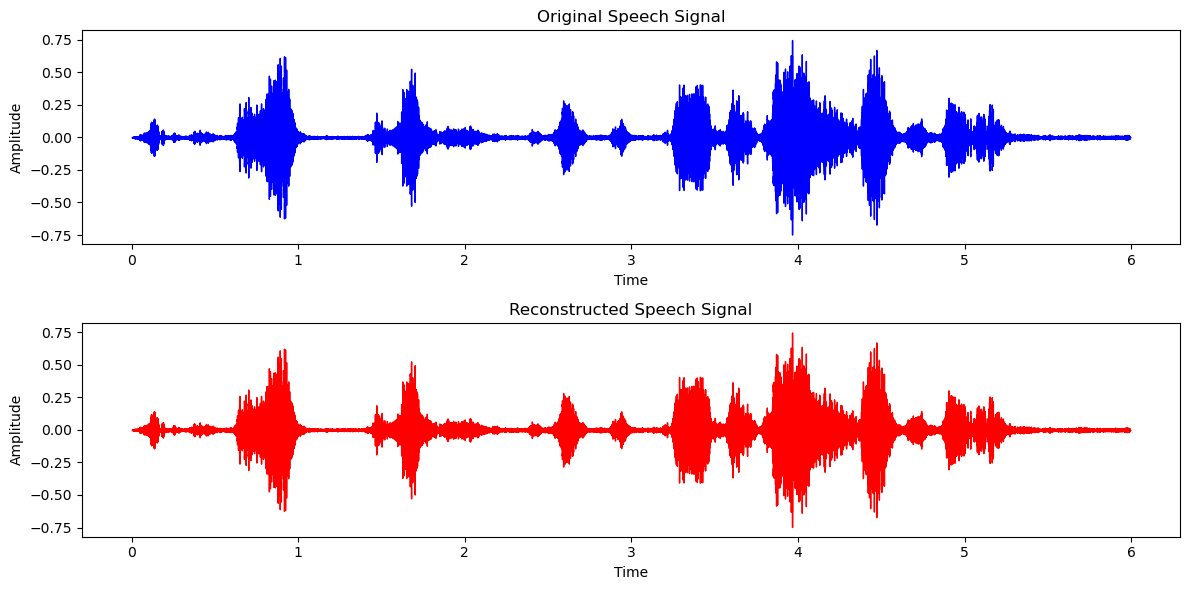

In [29]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='red')  
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

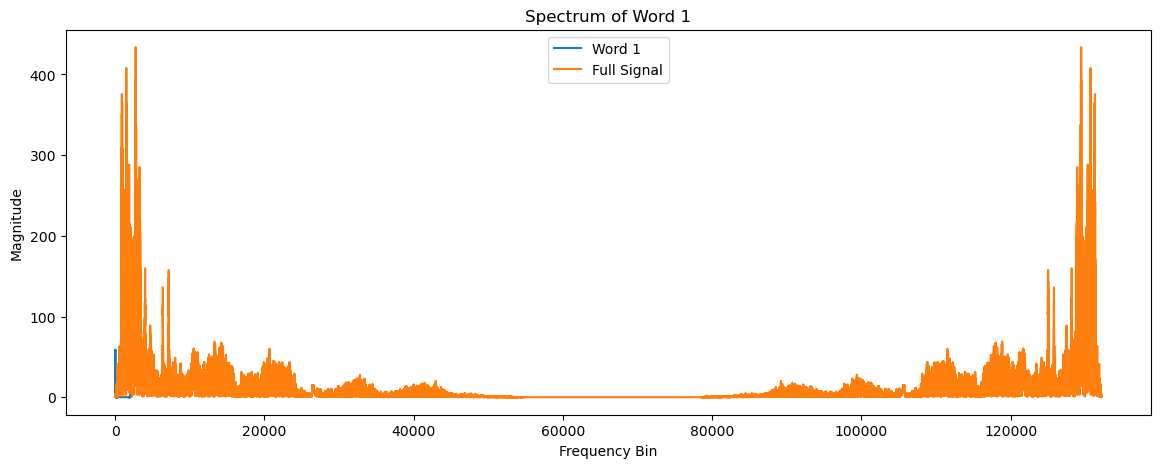

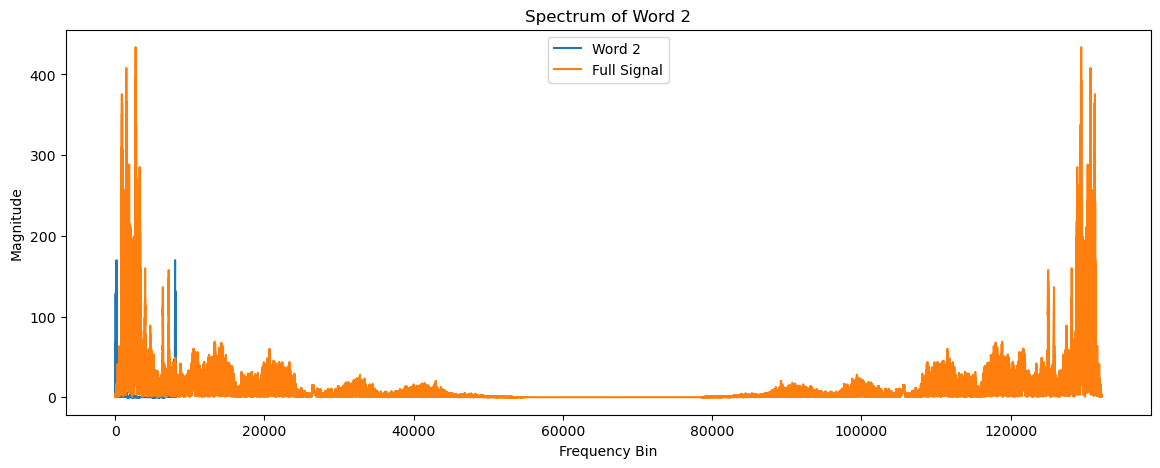

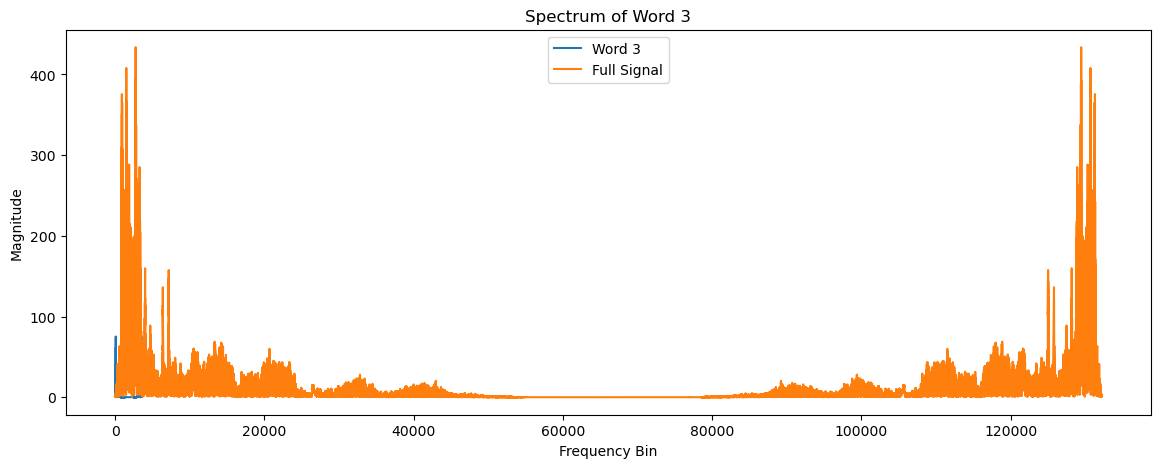

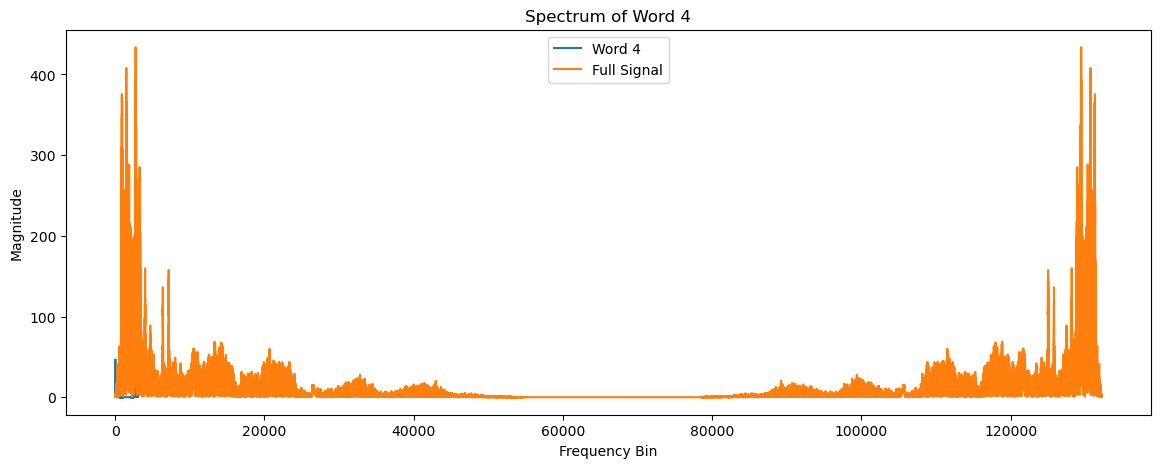

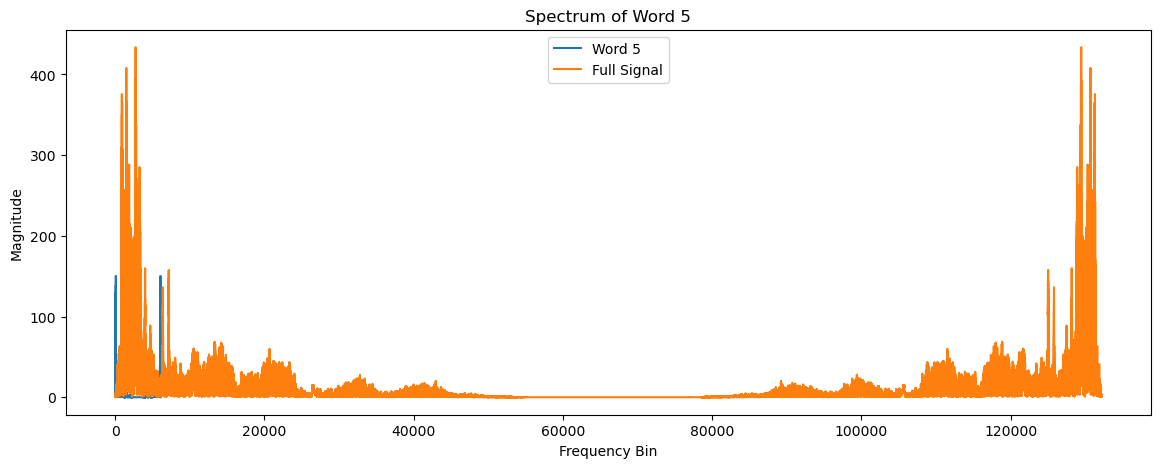

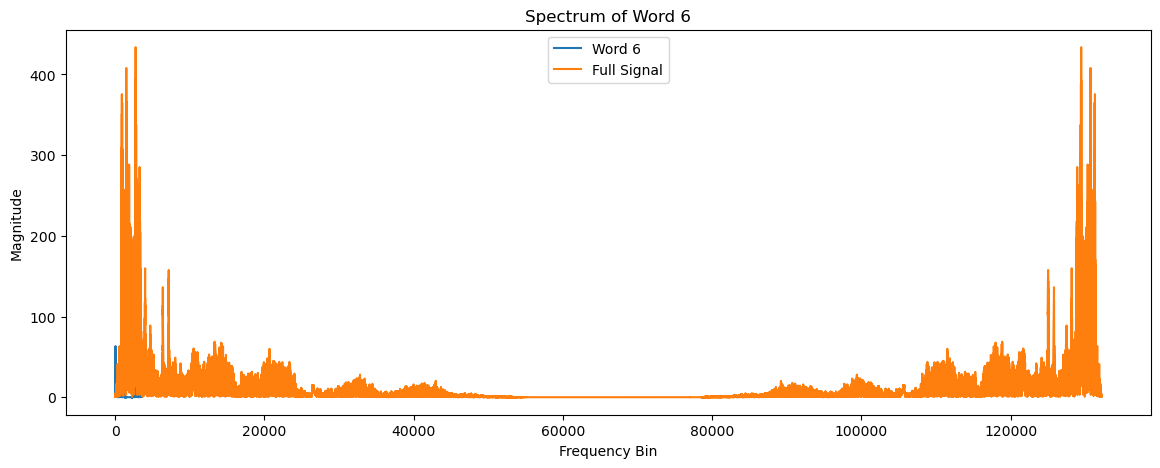

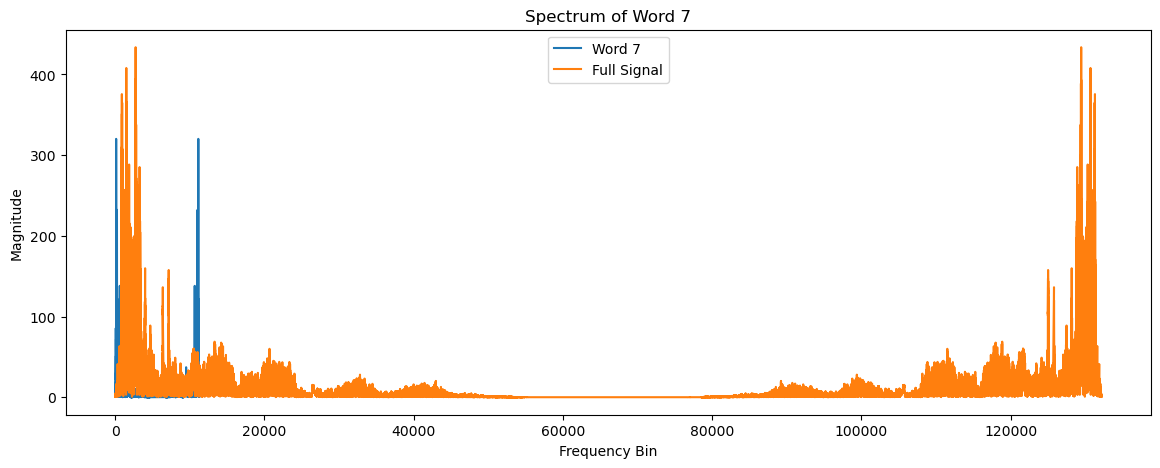

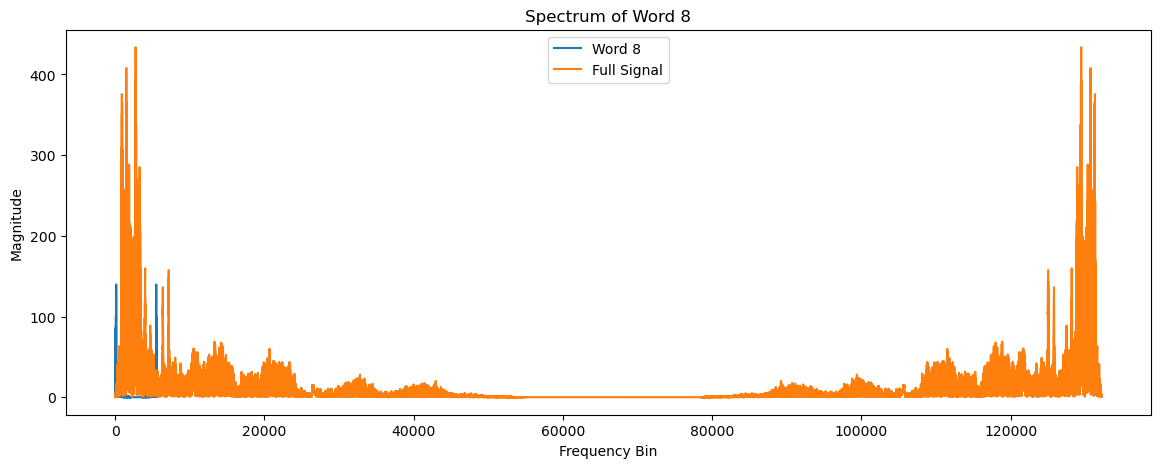

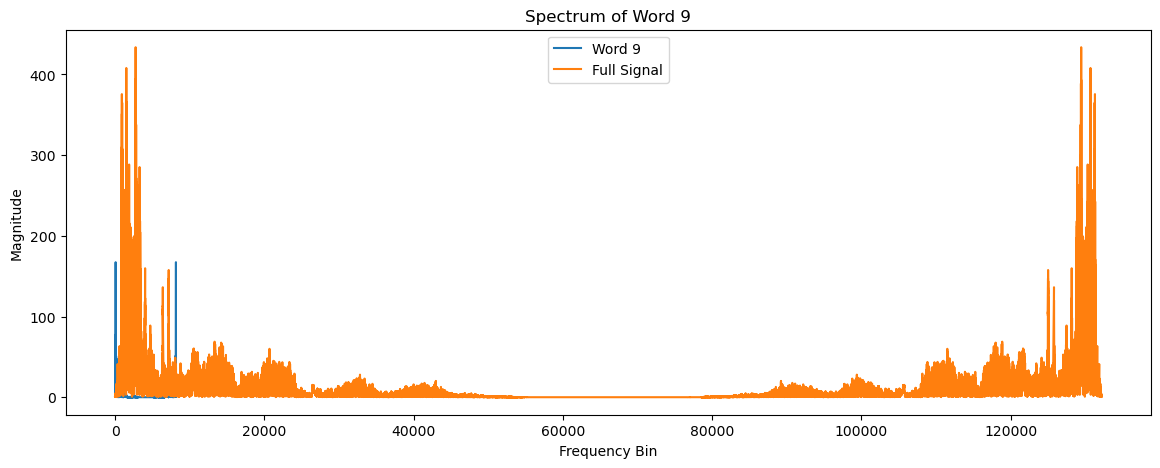

In [9]:
#A3
threshold = np.percentile(np.abs(y), 92)
segments = librosa.effects.split(y, top_db=-15 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = y[start:end]
    D_full = np.fft.fft(y)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}')
    plt.plot(np.abs(D_full), label='Full Signal')

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

In [10]:
#A4
window_size = int(0.02 * sr)  
overlap = int(0.01 * sr) 

y_windowed = librosa.effects.preemphasis(y)
y_frames = librosa.util.frame(y_windowed, frame_length=window_size, hop_length=overlap)

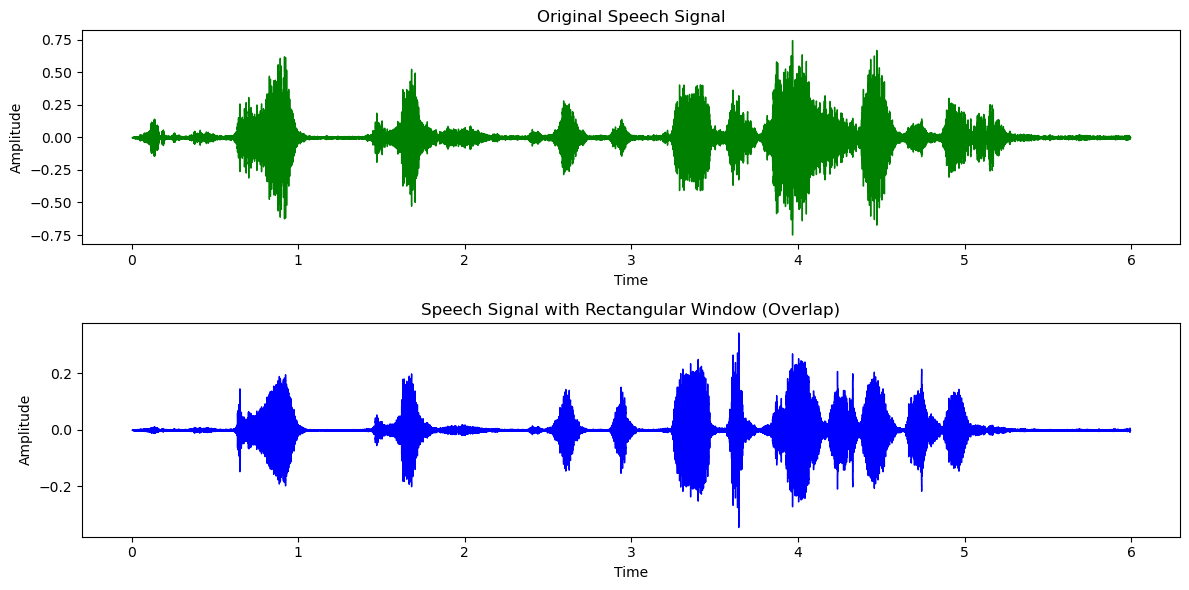

rectangular window


In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, color='blue')
plt.title('Speech Signal with Rectangular Window (Overlap)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("rectangular window")
ipd.display(ipd.Audio(y_windowed, rate=sr))

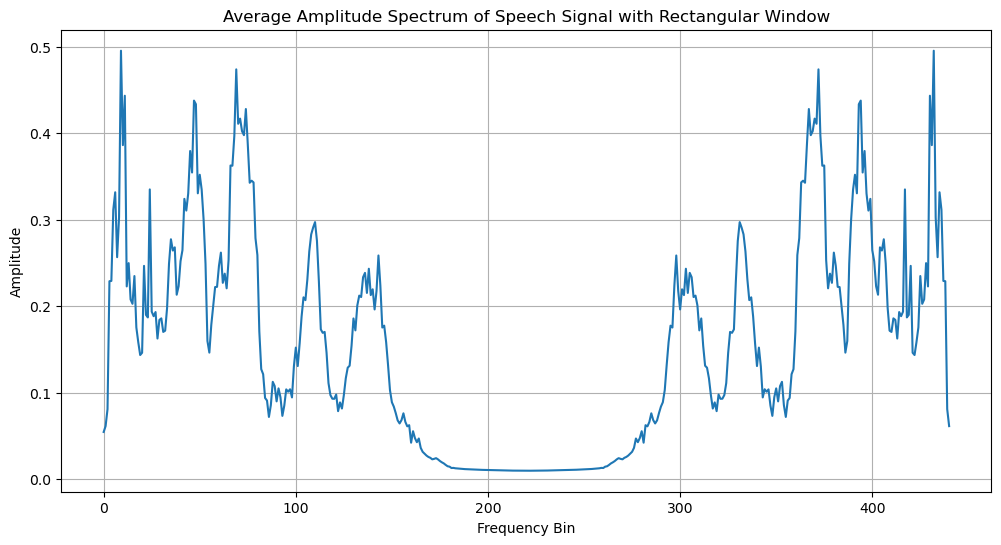

In [12]:
fft_results_windowed = np.fft.fft(y_frames, axis=0)
amplitude_spectrum_windowed = np.abs(fft_results_windowed)
plt.figure(figsize=(12, 6))
plt.plot(np.mean(amplitude_spectrum_windowed, axis=1)) 
plt.title('Average Amplitude Spectrum of Speech Signal with Rectangular Window')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

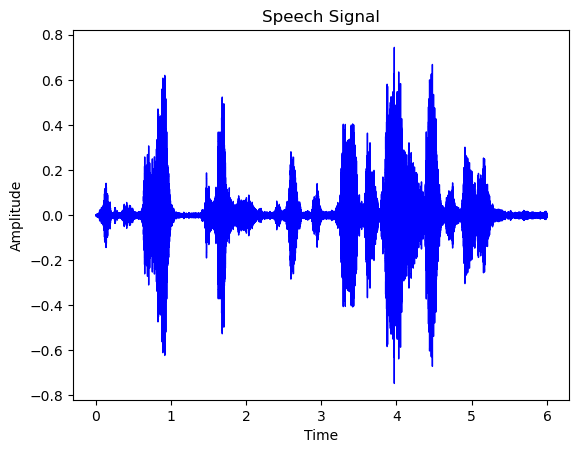

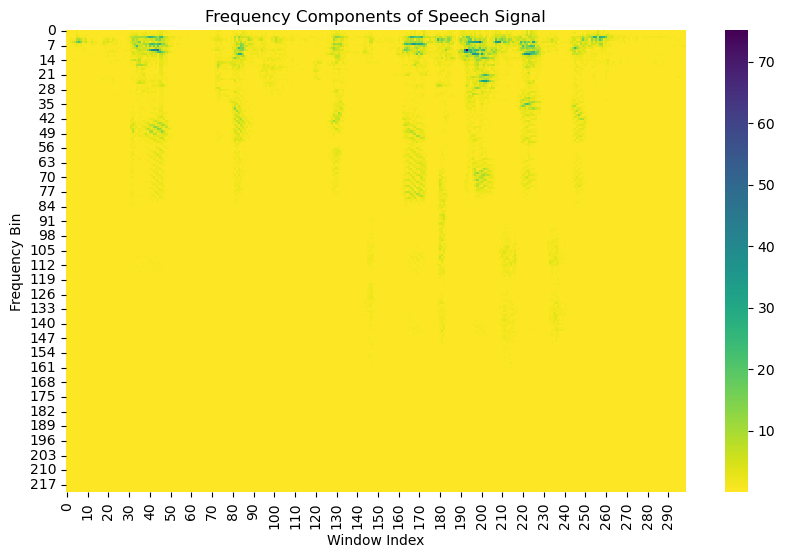

In [14]:
#A5
frequencies, times, spectrogram = signal.stft(y, fs=sr, nperseg=window_size, noverlap=overlap)
librosa.display.waveshow(y, sr=sr, color = 'blue')
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
window_length_sec = 0.02
window_length = int(window_length_sec * sr)
num_windows = len(y) // window_length
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))
for i in range(num_windows):
    window = y[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='viridis_r', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()

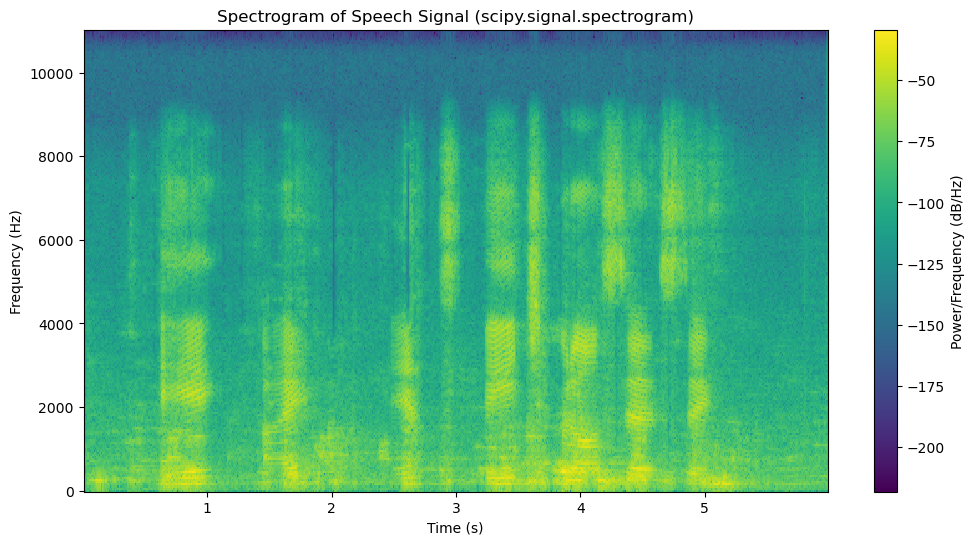

In [17]:
#A6
frequencies, times, Sxx = spectrogram(y, fs=sr, nperseg=window_size, noverlap=overlap)
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')

plt.title('Spectrogram of Speech Signal (scipy.signal.spectrogram)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

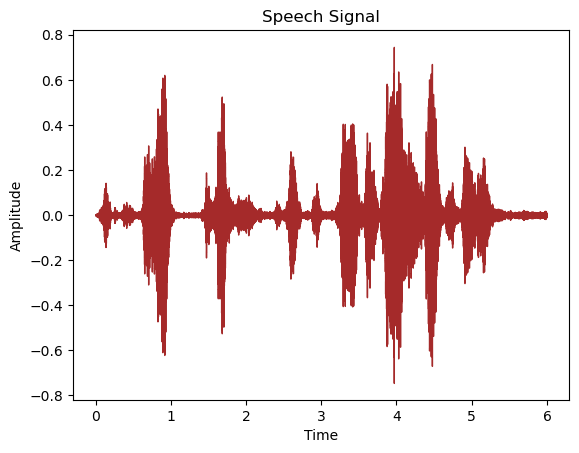

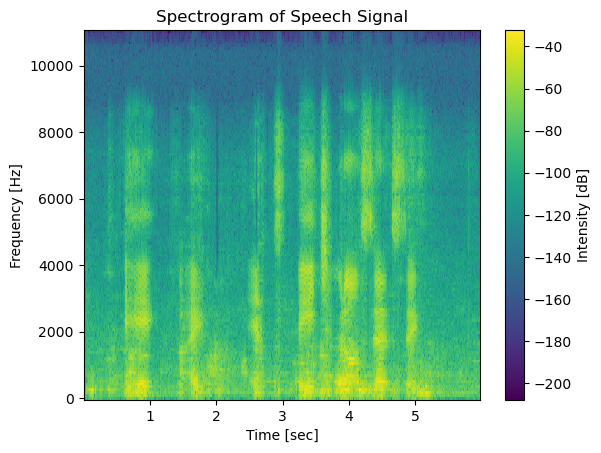

In [16]:
from scipy.signal import spectrogram

librosa.display.waveshow(y, color = 'brown')
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()